In [195]:
import matplotlib.font_manager as fm

# 列出所有可用字體
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(fm.FontProperties(fname=font).get_name())


Microsoft Himalaya
Bodoni MT
MecSoft_Font-1
Microsoft Yi Baiti
Segoe Script
Book Antiqua
High Tower Text
Dotted Songti Circle
851tegakizatsu
Microsoft JhengHei
Raleway
HP Simplified
Onyx
Ink Free
Segoe MDL2 Assets
Lucida Bright
Tw Cen MT
Franklin Gothic Demi
Playbill
Raleway
Calibri
Times New Roman
Century Schoolbook
Wim Pro
HP Simplified
HP Simplified
Ebrima
Raleway
Microsoft New Tai Lue
Consolas
Palatino Linotype
Dubai
Microsoft PhagsPa
Bauhaus 93
Baskerville Old Face
Times New Roman
Raleway
Kaisei Decol
Trebuchet MS
Snap ITC
Modern No. 20
SimSun
Segoe UI
GenSenRounded TW
Gigi
Microsoft Tai Le
Century Gothic
Gill Sans Ultra Bold Condensed
Perpetua
Century Gothic
Trebuchet MS
Raleway
Cooper Black
Calibri
DFKai-SB
Bell MT
Sylfaen
Calisto MT
Lucida Bright
Lucida Fax
Segoe UI
GenSenRounded TW
Goudy Stout
Gill Sans MT
Gill Sans MT
Candara
Segoe UI Symbol
Felix Titling
Courier New
Goudy Old Style
Raleway
MS Reference Specialty
HanaMinA
Sitka
Consolas
Poor Richard
Eras Bold ITC
Lucida Sans 

In [196]:
import os
os.chdir('C:\python-training\eyeglad\Amazon\Ads_analyze')
print(os.getcwd())


C:\python-training\eyeglad\Amazon\Ads_analyze


In [197]:

import pandas as pd
import market_explore.Amazon_datacleaning as cl
# import market_explore.Amazon_counting as counting
# import market_explore.table_visualize as tv
import matplotlib.pyplot as plt



In [198]:

filename = '240711_AmazonSales_OverFitGlasses'

# 讀取數據
data = pd.read_csv(f'C:/python-training/eyeglad/Amazon/data/marketing/{filename}.csv')
data
# 定義包含套鏡關鍵字的過濾函數
def filter_keywords(df, keywords):
    pattern = '|'.join(keywords)
    filtered_df = df[df['Product Name'].str.contains(pattern, case=False, na=False) | df['Brand Name'].str.contains(pattern, case=False, na=False)]
    excluded_df = df[~(df['Product Name'].str.contains(pattern, case=False, na=False) | df['Brand Name'].str.contains(pattern, case=False, na=False))]
    return filtered_df, excluded_df

# 自訂剔除品牌或產品
custom_exclusions = {
    'index': ['142','146'],
    'Brand Name': ['grinderPUNCH', 'TYA'],  # 自訂剔除的產品
    'Product Name':['Clip on',  'Flip up', 'Y2K', 
                    'Black Frame with Flip-up glasses - Shade 6.0',
                    'Certified ANSI Z87 Safety Glasses',
                    'ANSI Z87.1 Rated',
                    'Futuristic',
                    '6 Pack Polarized Sport Sunglasses for Men Multipack Sunglasses Pack Fit over Sunglasses Lot Set Mens Sport Fishing']
                }

# 剔除自訂品牌
for brand in custom_exclusions['Brand Name']:
    data = data[~data['Brand Name'].str.contains(brand, case=False, na=False)]

# 剔除自訂產品名稱中包含特定詞的產品
for product in custom_exclusions['Product Name']:
    data = data[~data['Product Name'].str.contains(product, case=False, na=False)]

# # 假設我們需要保留的關鍵字列表 有夾式
# keywords = ['Black Frame with Flip-up glasses - Shade 6.0', 'Fits Over', 'safetyblue', 'Global Vision', 'FitOns', 'Oakley GasCan', 'Glasses over', 'overfit', 'overfits', 'Flip up', 'Clip','Fitovers', 'Fitover','Over fit', 'Fit over','KANASTAL','Wraparounds', 'Wrap Around','Wraparound']

# 假設我們需要保留的關鍵字列表 無夾式
keywords = ['Fits Over', 'safetyblue', 'Global Vision', 'FitOns', 'Oakley GasCan', 'Glasses over', 'overfit', 'overfits', 'Fitovers', 'Fitover','Over fit', 'Fit over','KANASTAL','Wraparounds', 'Wrap Around','Wraparound']

# 過濾掉不相關的數據
filtered_data, excluded_data = filter_keywords(data, keywords)
data = filtered_data
print(f'delet {len(excluded_data)}')


delet 282


In [199]:

# 清理價格欄位
data['Price'] = cl.clean_price(data)

# 清理評分欄位
data['Star Rating'], data['Global Rating Count'] = cl.clean_star(data)

# 清理銷量欄位
data['Sales in the Last Month'] = cl.clean_monthly_sales(data)

# 檢查是否有缺失值並填充
data.fillna(method='ffill', inplace=True)

C:\Users\ailaz\AppData\Local\Temp\ipykernel_5860\1566365710.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [200]:
# 將價格中的 NaN 值填充為均值
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Price'].fillna(data['Price'].mean(), inplace=True)
len(data['Price'])

C:\Users\ailaz\AppData\Local\Temp\ipykernel_5860\3255885776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price'].fillna(data['Price'].mean(), inplace=True)


638

In [201]:
data['Crawling Date'] = f'20{filename[:6]}'
# print(data['Crawling Date'])

In [202]:

current_dir = os.getcwd()
print(current_dir)
# 將 DataFrame 保存為 CSV 文件
data.to_csv(f'{filename}.csv', index=False)
# 讀取數據
data2 = pd.read_csv(f'{current_dir}/{filename}.csv')


C:\python-training\eyeglad\Amazon\Ads_analyze


In [203]:

import matplotlib.pyplot as plt
import seaborn as sns

# 設置圖表風格
sns.set_theme(style='whitegrid')
# import matplotlib.font_manager as fm

# # 設置字體路徑
# font_path = 'C:\python-training\eyeglad\Amazon\Ads_analyze\market_explore\JF-OPENHUNINN-2.0.TTF'
# font_prop = fm.FontProperties(fname=font_path)
# plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
plt.rcParams['font.sans-serif'] = ['jf-openhuninn-2.0']
plt.rcParams['axes.unicode_minus'] = False


In [204]:
price_mean = data['Price'].astype(float).mean()
print(f'Price mean: {price_mean}\n')

Price mean: 20.66367741935484



In [205]:
# 計算每個產品的平均銷量和平均價格
product_sales_price = data.groupby('Product Name').agg({
    'Sales in the Last Month': 'mean',
    'Price': 'mean',
    'URL': 'first'
}).reset_index()
# 將產品按平均銷量降序排列，僅保留前20名
product_sales_price = product_sales_price.sort_values(by='Sales in the Last Month', ascending=False).head(20)
product_sales_price.to_csv('overfit_product_sales_price.csv', index=False)
product_sales_price

,Product Name,Sales in the Last Month,Price,URL
140,NoCry Safety Glasses Over Eyeglasses with Anti...,1000.000000,16.990000,https://www.amazon.com/NoCry-Eyeglasses-Wrapar...
115,MEETSUN Fit Over Glasses Sunglasses for Men Wo...,963.636364,14.517273,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
61,DUCO Wraparound Fitover Glasses Polarized Wear...,810.000000,26.980000,https://www.amazon.com/Sunglasses-Glasses-Wome...
141,NoCry Safety Glasses Over Eyeglasses — Fog and...,800.000000,12.990000,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
139,NoCry Anti Fog Safety Glasses that Fit Over Gl...,800.000000,17.990000,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
84,Face Shadow Polarized Sunglasses Fit Over Glas...,800.000000,17.656667,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
164,Polarized Sunglasses Fit Over Glasses Over Gla...,600.000000,16.990000,https://www.amazon.com/Leoidou-Sunglasses-Pres...
85,Face Shadow Polarized Sunglasses Over Glasses ...,485.714286,18.704286,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
183,SHEEN KELLY Oversized Polarized Fit Over Sungl...,471.428571,18.980000,https://www.amazon.com/Oversized-Sunglasses-Mi...
144,NoCry Tinted Safety Glasses Over Eyeglasses wi...,450.000000,16.990000,https://www.amazon.com/NoCry-Eyeglasses-Wrapar...


In [219]:
# 計算每個品牌的平均銷量和平均價格
brand_sales_price = data.groupby('Brand Name').agg({
    'Sales in the Last Month': 'mean',
    'Price': 'mean',
    'URL': 'first'
}).reset_index()
# 將品牌按平均銷量降序排列，僅保留前20名
brand_sales_price = brand_sales_price.sort_values(by='Sales in the Last Month', ascending=False).head(20)
brand_sales_price.to_csv('overfit_brand_sales_price.csv', index=False)
brand_sales_price


,Brand Name,Sales in the Last Month,Price,URL
53,MEETSUN,668.421053,15.558421,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
59,NoCry,572.727273,39.444545,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
28,Face Shadow,527.272727,18.535455,https://www.amazon.com/Face-Shadow-Sunglasses-...
73,SHEEN KELLY,425.000000,17.981250,https://www.amazon.com/Oversized-Sunglasses-Mi...
31,Frienda,350.000000,19.990000,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
5,BLUE CUT,230.000000,23.928667,https://www.amazon.com/Polarized-Sunglasses-Dr...
92,Yogo Vision,227.500000,18.060000,https://www.amazon.com/Sunglasses-Protection-P...
4,BIRCEN,200.000000,21.970000,https://www.amazon.com/BIRCEN-Night-Vision-Gla...
61,Optix 55,200.000000,17.950000,https://www.amazon.com/Night-Vision-Wraparound...
44,JIANGTUN,200.000000,15.990000,https://www.amazon.com/Glasses-Prescription-Su...


In [220]:
# 計算每個品牌的平均銷量和平均價格
brand_sales_price_sum = data.groupby('Brand Name').agg({
    'Sales in the Last Month': 'sum',
    'Price': 'mean',
    'URL': 'first'
}).reset_index()
# 將品牌按平均銷量降序排列，僅保留前20名
brand_sales_price_sum = brand_sales_price_sum.sort_values(by='Sales in the Last Month', ascending=False).head(20)
brand_sales_price_sum.to_csv('overfit_brand_sales_price_sum.csv', index=False)
brand_sales_price_sum


,Brand Name,Sales in the Last Month,Price,URL
53,MEETSUN,12700,15.558421,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
55,Meeloog,7600,19.624615,https://www.amazon.com/Meeloog-Polarized-Sungl...
59,NoCry,6300,39.444545,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
28,Face Shadow,5800,18.535455,https://www.amazon.com/Face-Shadow-Sunglasses-...
19,DUCO,4850,25.719737,https://www.amazon.com/Sunglasses-Glasses-Wome...
92,Yogo Vision,4550,18.060000,https://www.amazon.com/Sunglasses-Protection-P...
5,BLUE CUT,3450,23.928667,https://www.amazon.com/Polarized-Sunglasses-Dr...
73,SHEEN KELLY,3400,17.981250,https://www.amazon.com/Oversized-Sunglasses-Mi...
31,Frienda,2450,19.990000,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
66,Peekaco,1350,24.200769,https://www.amazon.com/sspa/click?ie=UTF8&spc=...


In [226]:
# 找到 brand_sales_price_sum 中存在但在 brand_sales_price 中不存在的 Brand Name
difference = set(brand_sales_price_sum['Brand Name']).difference(set(brand_sales_price['Brand Name']))

# 打印结果
print(difference)

{'FIMOSON', 'GEGURI', 'Peekaco', 'FEISEDY', 'HAOLOTA', 'Leoidou'}


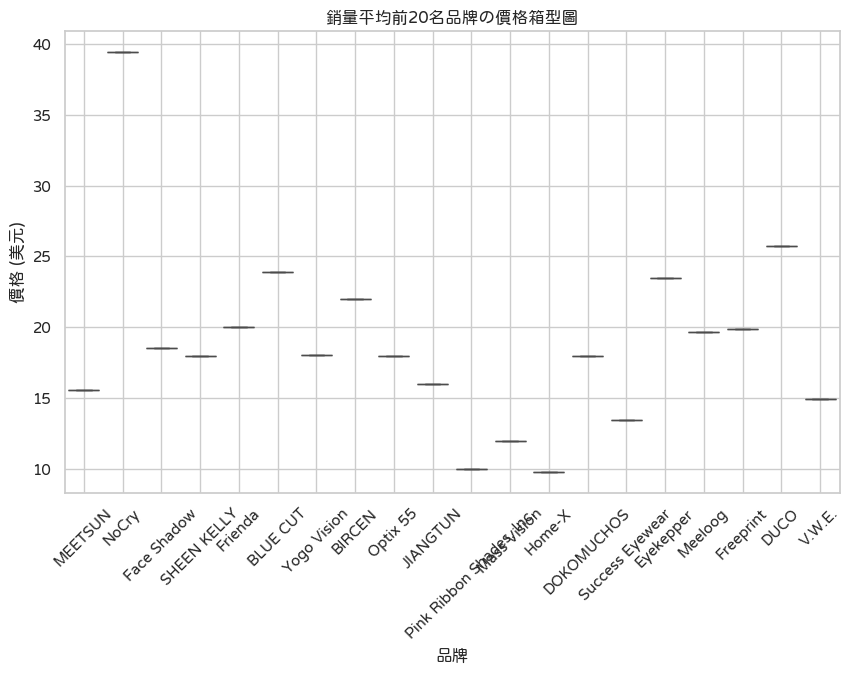

In [221]:
# 繪製每個品牌的價格箱型圖
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand Name', y='Price', data=brand_sales_price)
plt.title('銷量平均前20名品牌の價格箱型圖')
plt.xlabel('品牌')
plt.ylabel('價格 (美元)')
plt.xticks(rotation=45)
plt.gca().grid(True)  # 使用 gca().grid 顯示網格
plt.show()


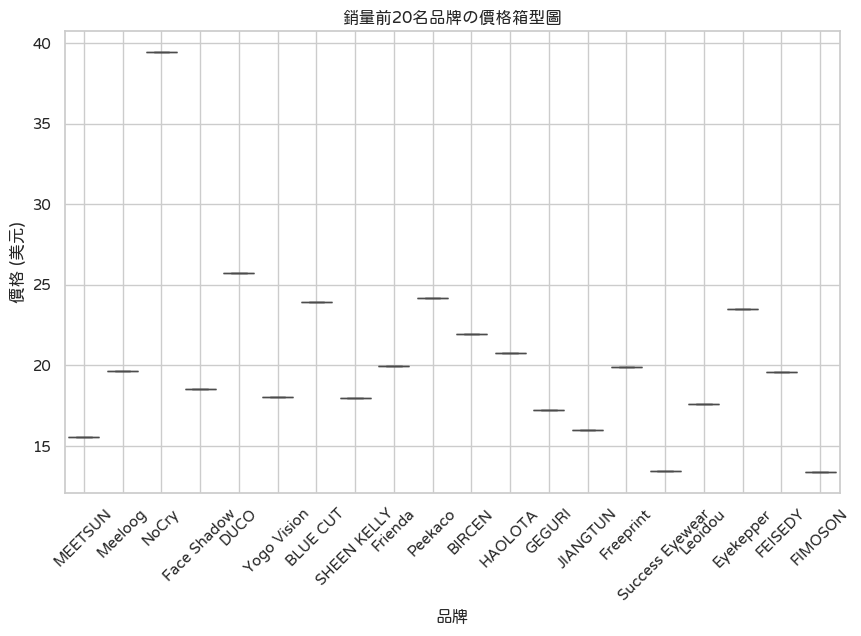

In [222]:
# 繪製每個品牌的價格箱型圖
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand Name', y='Price', data=brand_sales_price_sum)
plt.title('銷量前20名品牌の價格箱型圖')
plt.xlabel('品牌')
plt.ylabel('價格 (美元)')
plt.xticks(rotation=45)
plt.gca().grid(True)  # 使用 gca().grid 顯示網格
plt.show()

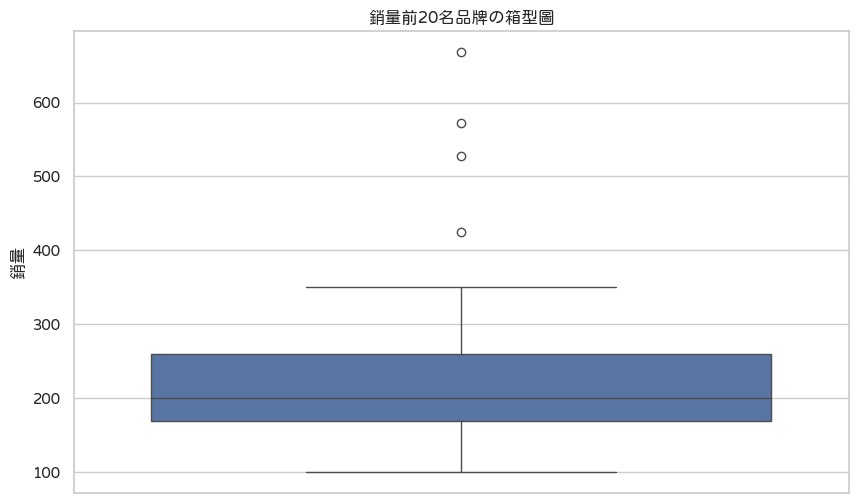

In [208]:
# 繪製銷量的箱型圖
plt.figure(figsize=(10, 6))
sns.boxplot(y=brand_sales_price['Sales in the Last Month'])
plt.title('銷量前20名品牌の箱型圖')
plt.ylabel('銷量')
plt.show()

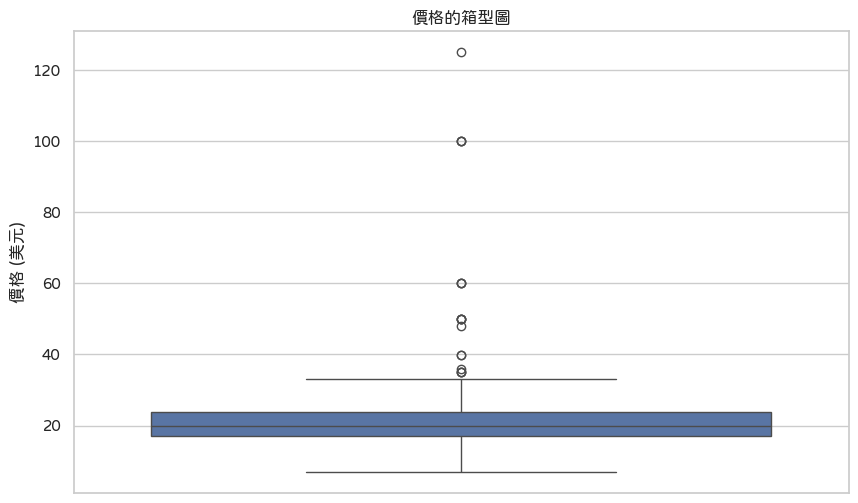

In [209]:

# 繪製價格的箱型圖
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Price'])
plt.title('價格的箱型圖')
plt.ylabel('價格 (美元)')
plt.show()


In [210]:
import numpy as np
import pandas as pd

# 計算每個品牌的總銷量
brand_sales = data.groupby('Brand Name')['Sales in the Last Month'].sum().reset_index()

# 按銷量排序
brand_sales = brand_sales.sort_values(by='Sales in the Last Month', ascending=False)

# 計算累積銷量百分比
brand_sales['Cumulative Sales'] = brand_sales['Sales in the Last Month'].cumsum()
brand_sales['Cumulative Percentage'] = brand_sales['Cumulative Sales'] / brand_sales['Sales in the Last Month'].sum()

# 找出累積到80%的品牌
brands_80_percent = brand_sales[brand_sales['Cumulative Percentage'] <= 0.8]

# 打印出這些品牌
print("Brands contributing to 80% of total sales:")
print(brands_80_percent[['Brand Name', 'Sales in the Last Month', 'Cumulative Percentage']])

# 如果你也想顯示這些品牌的產品和URL，可以過濾原始數據
high_sales_products_info = data[data['Brand Name'].isin(brands_80_percent['Brand Name'])][['Brand Name', 'Product Name', 'URL']]
print("\nProducts of these brands and their URLs:")
print(high_sales_products_info)


Brands contributing to 80% of total sales:
     Brand Name  Sales in the Last Month  Cumulative Percentage
53      MEETSUN                    12700               0.191698
55      Meeloog                     7600               0.306415
59        NoCry                     6300               0.401509
28  Face Shadow                     5800               0.489057
19         DUCO                     4850               0.562264
92  Yogo Vision                     4550               0.630943
5      BLUE CUT                     3450               0.683019
73  SHEEN KELLY                     3400               0.734340
31      Frienda                     2450               0.771321
66      Peekaco                     1350               0.791698

Products of these brands and their URLs:
      Brand Name                                       Product Name  \
1          NoCry  NoCry Safety Glasses That Fit Over Your Prescr...   
11       Meeloog  Meeloog Polarized Fit Over Glasses Sunglasses ...  

In [211]:
import numpy as np

# 計算累積分布函數 (CDF)
sorted_sales = np.sort(data['Sales in the Last Month'])
cdf = np.arange(1, len(sorted_sales) + 1) / len(sorted_sales)

# 找出80%的銷量範圍
sales_80_percent_index = np.searchsorted(cdf, 0.8)
sales_80_percent_value = sorted_sales[sales_80_percent_index]

# 找出銷量高於80%臨界值的產品
high_sales_products = data[data['Sales in the Last Month'] > sales_80_percent_value]

# 打印出這些產品及其URL
high_sales_products_info = high_sales_products[['Brand Name', 'Product Name', 'URL']]
# print(len(high_sales_products_info))
high_sales_brand = high_sales_products.groupby('Brand Name').agg({
    'Sales in the Last Month': 'mean',
    'Price': 'mean'
}).reset_index()
# print(len(high_sales_brand))
high_sales_brand = high_sales_brand.sort_values(by='Sales in the Last Month', ascending=False)
high_sales_brand

,Brand Name,Sales in the Last Month,Price
13,MEETSUN,1008.333333,15.573333
3,DUCO,1000.000000,26.980000
16,NoCry,787.500000,16.740000
19,SHEEN KELLY,750.000000,18.980000
8,Frienda,700.000000,19.990000
12,Leoidou,600.000000,16.990000
15,Meeloog,590.909091,19.535455
6,Face Shadow,580.000000,18.390000
23,Yogo Vision,528.571429,19.361429
4,Dioptics,400.000000,18.700000


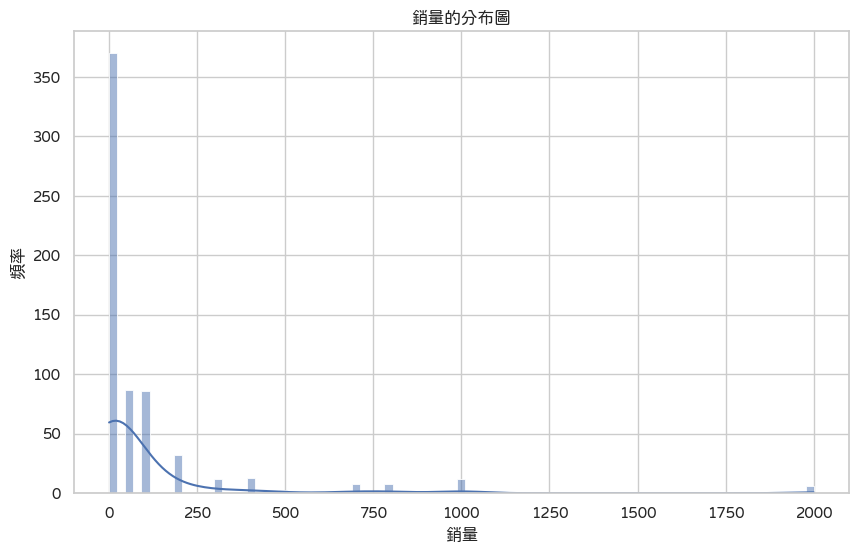

In [212]:

# 繪製銷量的分布圖
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales in the Last Month'], kde=True)
plt.title('銷量的分布圖')
plt.xlabel('銷量')
plt.ylabel('頻率')
plt.show()


93
Products contributing to 80% of total sales:
                                          Product Name  Total Sales  \
46   MEETSUN Fit Over Glasses Sunglasses for Men Wo...         2000   
583  Face Shadow Polarized Sunglasses Over Glasses ...         2000   
44   MEETSUN Fit Over Glasses Sunglasses for Men Wo...         2000   
45   MEETSUN Fit Over Glasses Sunglasses for Men Wo...         2000   
47   MEETSUN Fit Over Glasses Sunglasses for Men Wo...         2000   
..                                                 ...          ...   
521  Face Shadow Polarized Sunglasses Over Glasses ...          200   
533  Face Shadow Polarized Sunglasses Over Glasses ...          200   
528  Face Shadow Polarized Sunglasses Over Glasses ...          200   
575  Polarized Sunglasses for Women, Rhinestone Wra...          200   
955  Polarized Fit Over Wear Over Glasses Sunglasse...          200   

     Cumulative Percentage                                                URL  
46                0

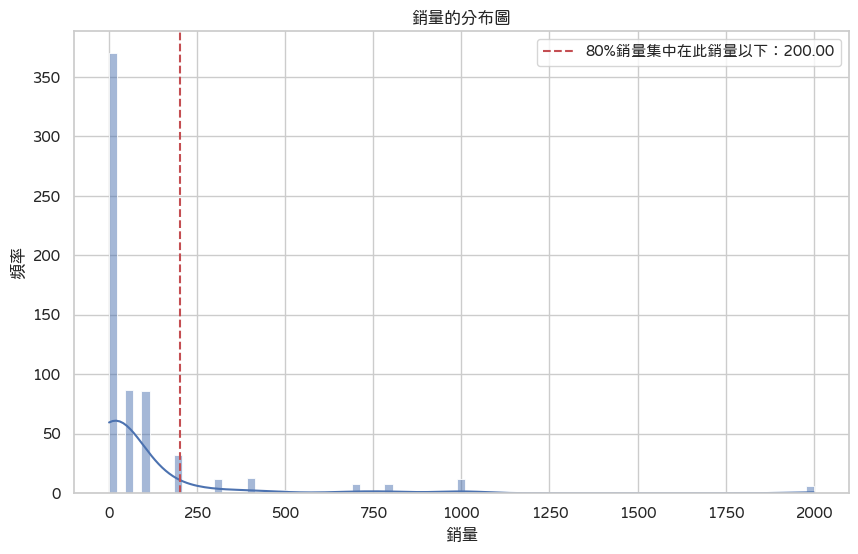

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# 計算每個產品的總銷量
product_sales = data[['Product Name', 'Sales in the Last Month', 'URL']].copy()
product_sales['Total Sales'] = data['Sales in the Last Month']

# 按銷量排序
product_sales = product_sales.sort_values(by='Total Sales', ascending=False)

# 計算累積銷量百分比
product_sales['Cumulative Sales'] = product_sales['Total Sales'].cumsum()
product_sales['Cumulative Percentage'] = product_sales['Cumulative Sales'] / product_sales['Total Sales'].sum()

# 找出累積到80%的產品
products_80_percent = product_sales[product_sales['Cumulative Percentage'] <= 0.8]

# 找到累積到80%的銷量值
sales_80_percent_value = products_80_percent['Total Sales'].iloc[-1]

# 打印出這些產品及其URL
print(len(products_80_percent))
print("Products contributing to 80% of total sales:")
print(products_80_percent[['Product Name', 'Total Sales', 'Cumulative Percentage', 'URL']])

# 繪製銷量的分布圖
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales in the Last Month'], kde=True)
plt.title('銷量的分布圖')
plt.xlabel('銷量')
plt.ylabel('頻率')

# 標註80%的銷量範圍
plt.axvline(sales_80_percent_value, color='r', linestyle='--', label=f'80%銷量集中在此銷量以下：{sales_80_percent_value:.2f}')
plt.legend()

plt.show()


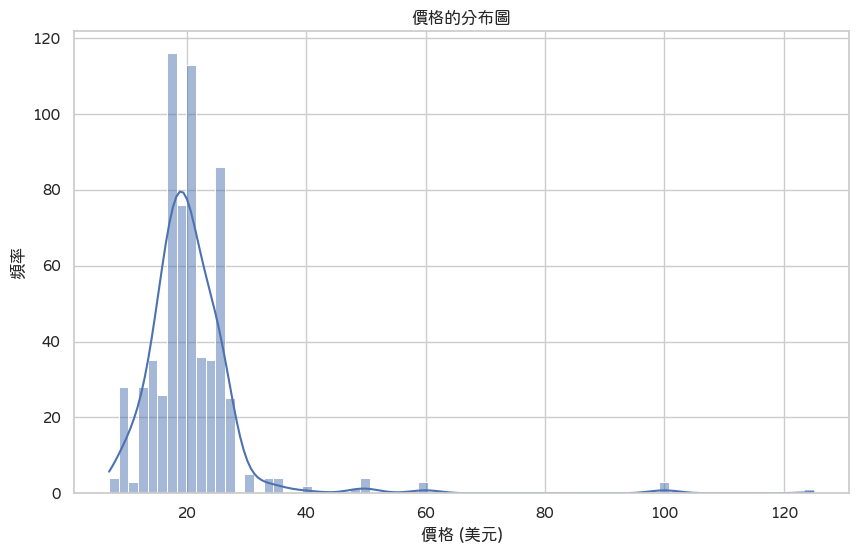

In [214]:

# 繪製價格的分布圖
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('價格的分布圖')
plt.xlabel('價格 (美元)')
plt.ylabel('頻率')
plt.show()


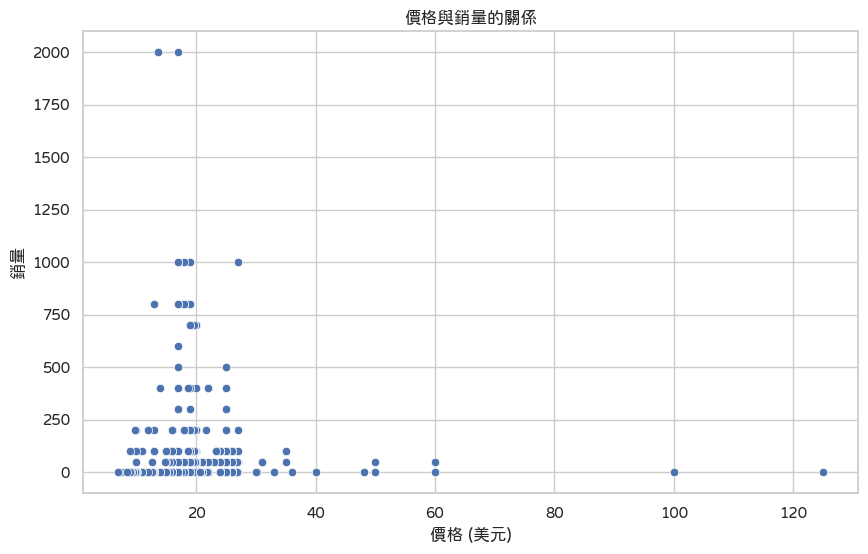

In [215]:

# 繪製價格與銷量的關係
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Price'], y=data['Sales in the Last Month'])
plt.title('價格與銷量的關係')
plt.xlabel('價格 (美元)')
plt.ylabel('銷量')
plt.show()


In [216]:

# 計算每個品牌的平均銷量和平均價格
brand_sales_price = data.groupby('Brand Name').agg({
    'Sales in the Last Month': 'mean',
    'Price': 'mean',
    'URL': 'first'
}).reset_index()


C:\Users\ailaz\AppData\Local\Temp\ipykernel_5860\2207945809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand Name', y='Sales in the Last Month', data=brand_sales_price, palette='viridis')


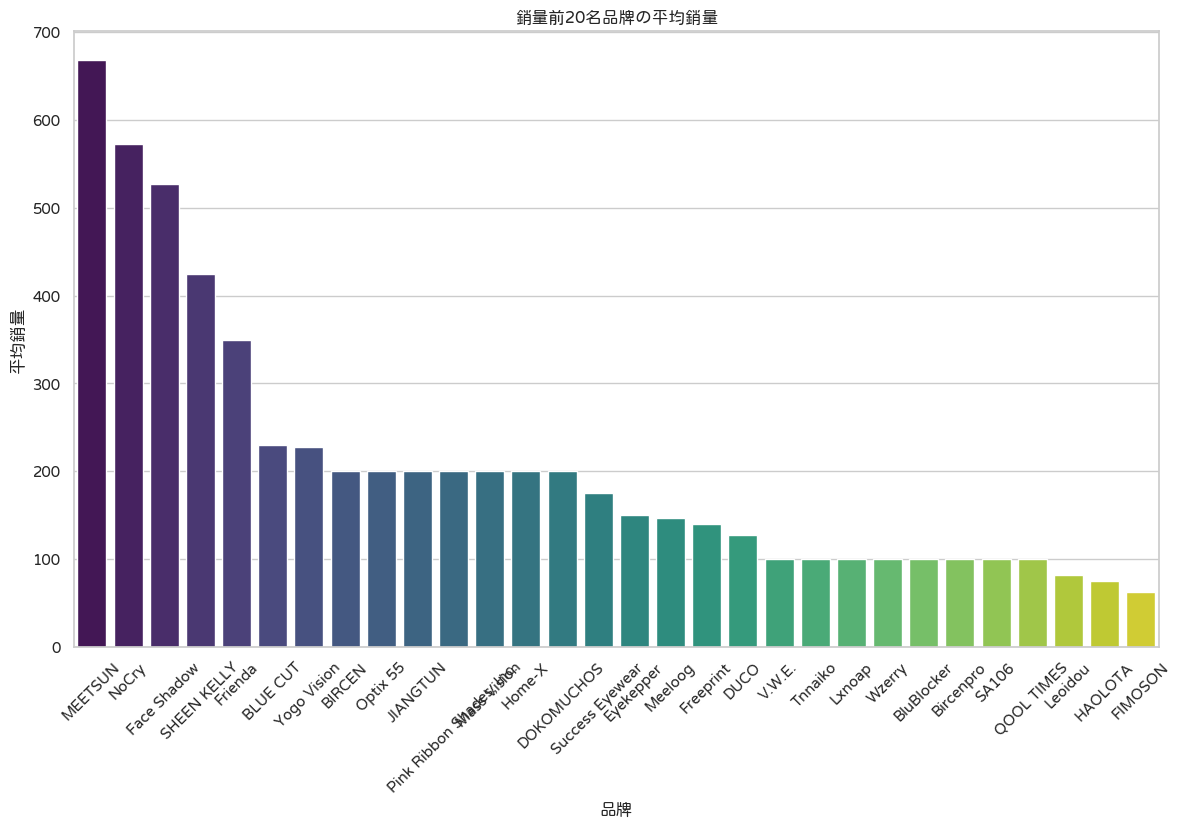

C:\Users\ailaz\AppData\Local\Temp\ipykernel_5860\2207945809.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand Name', y='Price', data=brand_sales_price, palette='viridis')


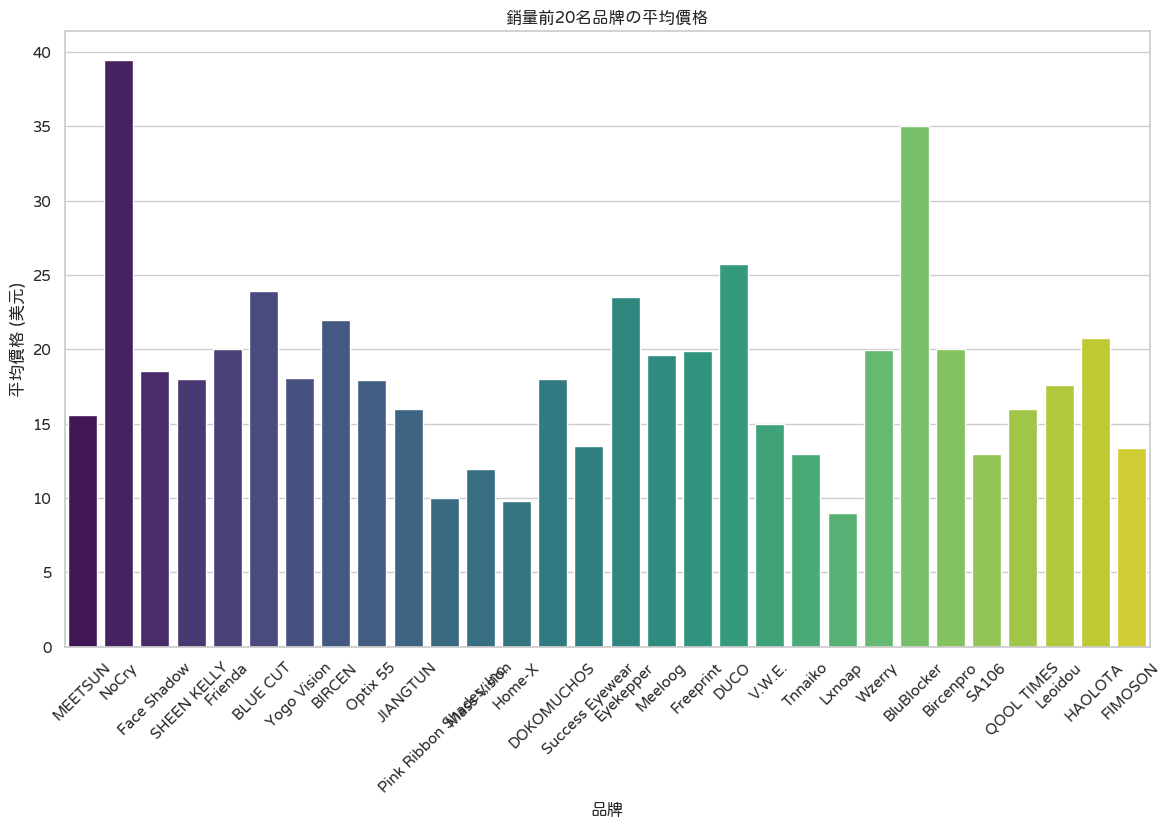

In [217]:

# 將品牌按平均銷量降序排列
brand_sales_price = brand_sales_price.sort_values(by='Sales in the Last Month', ascending=False).head(30)

# 繪製平均銷量的條形圖
plt.figure(figsize=(14, 8))
sns.barplot(x='Brand Name', y='Sales in the Last Month', data=brand_sales_price, palette='viridis')
plt.title('銷量前20名品牌の平均銷量')
plt.xlabel('品牌')
plt.xticks(rotation=45)
plt.ylabel('平均銷量')
plt.show()

# 繪製平均價格的條形圖
plt.figure(figsize=(14, 8))
sns.barplot(x='Brand Name', y='Price', data=brand_sales_price, palette='viridis')
plt.title('銷量前20名品牌の平均價格')
plt.xlabel('品牌')
plt.xticks(rotation=45)
plt.ylabel('平均價格 (美元)')
plt.show()


In [218]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 確保 'Sales in the Last Month' 和 'Price' 是數字類型
data['Sales in the Last Month'] = pd.to_numeric(data['Sales in the Last Month'], errors='coerce')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# 清理評分數據
data['Star Rating'] = pd.to_numeric(data['Star Rating'], errors='coerce')
data['Global Rating Count'] = pd.to_numeric(data['Global Rating Count'], errors='coerce')

# 去除任何 NaN 值
data = data.dropna(subset=['Sales in the Last Month', 'Price', 'Star Rating', 'Global Rating Count'])

# 創建新的特徵
data['Log Price'] = np.log1p(data['Price'])
data['Price to Rating'] = data['Price'] / data['Star Rating']

# 避免除以零
data = data[data['Star Rating'] != 0]

# 檢查無窮大和極大值
features_to_check = ['Log Price', 'Price to Rating']
for feature in features_to_check:
    data = data[np.isfinite(data[feature])]

# 選擇特徵和目標變量
X = data[['Price', 'Star Rating', 'Global Rating Count', 'Log Price', 'Price to Rating']]
y = data['Sales in the Last Month']

# 分割數據為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建標準化對象
scaler = StandardScaler()

# 對特徵進行標準化處理
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定義隨機森林模型
rf = RandomForestRegressor(random_state=42)

# 設置超參數網格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 使用 GridSearchCV 進行超參數調整
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# 最優參數和模型
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

# 預測
y_pred = best_model.predict(X_test_scaled)

# 評估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# 繪製實際值與預測值的關係
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('實際值與預測值的關係')
plt.xlabel('實際值')
plt.ylabel('預測值')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 加上 y = x 的對角線
plt.show()

# 顯示特徵重要性
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('特徵重要性')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('相對重要性')
plt.show()


ModuleNotFoundError: No module named 'sklearn'